In [46]:
import csv
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sn
import statistics as stat
from collections import Counter
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
import matplotlib.ticker as ticker
import math
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.patches as patches
sn.set(style='ticks')

In [47]:
# Description of mpl.rcParams and seetings
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
# Description of mpl.rcParams and seetings
# https://matplotlib.org/stable/tutorials/introductory/customizing.html

#mpl.rcParams['figure.figsize'] = (3.33,3.33)
mpl.rcParams['figure.dpi'] = 300

mpl.rcParams['font.size'] = 9
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = "Myriad Pro"

mpl.rcParams['lines.linewidth'] = 1.0

mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelweight'] = "bold"

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1.5

mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['ytick.major.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['ytick.major.width'] = mpl.rcParams['xtick.major.width']
mpl.rcParams['ytick.minor.width'] = mpl.rcParams['xtick.minor.width']

mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['figure.dpi'] = 300

mpl.rcParams['font.size'] = 9
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = "Myriad Pro"

mpl.rcParams['lines.linewidth'] = 1.0

mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelweight'] = "bold"

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1.5

mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['ytick.major.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['ytick.major.width'] = mpl.rcParams['xtick.major.width']
mpl.rcParams['ytick.minor.width'] = mpl.rcParams['xtick.minor.width']

mpl.rcParams['legend.fancybox'] = True

In [48]:
#it can all run from this notebook now!
#work on shortening and removing unnecessary stuff after the analysis of non XLed PSMs to get %XL
#Next things to improve: set to save to a pdf instead of printing, move to one cell, set to loop through files
    #actually would probably be beter to set the whole prgram as 1 file to loop through files

In [49]:
#all manual inputs here
#set below to be the charges that have XL models
charges=["+3","+4","+5","+6","+7"]
Bsite=9
#below is unlinked minimum probability for desired FDR
minprob=0.541
DesiredFDR=0.01
maxgrad=65

In [50]:
#Define BPA site and add it to the protein sequence
#sequence=open("sequence.txt","r").read()
protein="HSPB5"
#protein2="Tau"
protein2="HSPB1"
sequence0 = "MDIAIHHPWIRRPFFPFHSPSRLFDQFFGEHLLESDLFPTSTSLSPFYLRPPSFLRAPSWFDTGLSEMRLEKDRFSVNLDVKHFSPEELKVKVLGDVIEVHGKHEERQDEHGFISREFHRKYRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKPAVTAAPKK"
#if B1
clientseq="MTERRVPFSLLRGPSWDPFRDWYPHSRLFDQAFGLPRLPEEWSQWLGGSSWPGYVRPLPPAAIESPAVAAPAYSRALSRQLSSGVSEIRHTADRWRVSLDVNHFAPDELTVKTKDGVVEITGKHEERQDEHGYISRSFTRKYTLPPGVDPTQVSSSLSPEGTLTVEAPMPKLATQSNEITIPVTFESRAQLGGPEAAKSDETAAK"
#if B6
#clientseq="MEIPVPVQPSWLRRASAPLPGLSAPGRLFDQRFGEGLLEAELAALSPTTLAPYYLRAPSVALPVAQVPTDPGHFSVLLDVKHFSPEEIAVKVVGEHVEVHARHEERPDEHGFVAREFHRRYRLPPGVDPAAVTSALSPEGVLSIQAAPASAQAPPPAAAK"
#Full Tau
#clientseq="MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTEDGSEEPGSETSDAKSTPTAEDVTAPLVDEGAPGKQAAAQPHTEIPEGTTAEEAGIGDTPSLEDEAAGHVTQEPESGKVVQEGFLREPGPPGLSHQLMSGMPGAPLLPEGPREATRQPSGTGPEDTEGGRHAPELLKHQLLGDLHQEGPPLKGAGGKERPGSKEEVDEDRDVDESSPQDSPPSKASPAQDGRPPQTAAREATSIPGFPAEGAIPLPVDFLSKVSTEIPASEPDGPSVGRAKGQDAPLEFTFHVEITPNVQKEQAHSEEHLGRAAFPGAPGEGPEARGPSLGEDTKEADLPEPSEKQPAAAPRGKPVSRVPQLKARMVSKSKDGTGSDDKKAKTSTRSSAKTLKNRPCLSPKHPTPGSSDPLIQPSSPAVCPEPPSSPKYVSSVTSRTGSSGAKEMKLKGADGKTKIATPRGAAPPGQKGQANATRIPAKTPPAPKTPPSSGEPPKSGDRSGYSSPGSPGTPGSRSRTPSLPTPPTREPKKVAVVRTPPKSPSSAKSRLQTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIINKKLDLSNVQSKCGSKDNIKHVPGGGSVQIVYKPVDLSKVTSKCGSLGNIHHKPGGGQVEVKSEKLDFKDRVQSKIGSLDNITHVPGGGNKKIETHKLTFRENAKAKTDHGAEIVYKSPVVSGDTSPRHLSNVSSTGSIDMVDSPQLATLADEVSASLAKQGL"
print(sequence0[Bsite-1])
BPAsite="B"+str(Bsite)
print(BPAsite)
print(sequence0[Bsite-1])
sequence = sequence0[:Bsite-1] + "B" + sequence0[Bsite:]
#sequence = sequence0[:Bsite-1] + "B" + sequence0[Bsite:44] +"D"+sequence0[45:]
numAA = len(sequence)
print(sequence)

W
B9
W
MDIAIHHPBIRRPFFPFHSPSRLFDQFFGEHLLESDLFPTSTSLSPFYLRPPSFLRAPSWFDTGLSEMRLEKDRFSVNLDVKHFSPEELKVKVLGDVIEVHGKHEERQDEHGFISREFHRKYRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKPAVTAAPKK


In [51]:
#read in non-validated kojak results
kojaknonval = pd.read_csv(
    'kojakresult.txt', sep="\t",header=1)
kojaknonval["Protein"]=kojaknonval["Protein #1"]+kojaknonval["Protein #2"]

In [52]:
#read in XL error table
probs=pd.read_csv("senserror.csv")
#print(probs)
locs=[]
for each in charges:
    loc=probs[probs['Error_Rate'] == each+" only"].index[0]
    locs.append(loc)
charges = [s.strip("+") for s in charges]
print(charges)
#print(len(probs))
d_probs = {}
for i in range(len(locs)):
    if i < (len(locs)-1):
        filt=probs.iloc[locs[i]:locs[i+1],:]
        filt=filt.reset_index()
    else:
        filt=probs.iloc[locs[i]:,:]
        filt=filt.reset_index()
    filt=filt.drop([0])
    #d_probs["prob" + str(i)]=probs.iloc[locs[i]:end,:]
    d_probs[charges[i]]=filt
print(d_probs)

['3', '4', '5', '6', '7']
{'3':     index Error_Rate  min_prob  num_correct  num_incorrect Unnamed: 4
1      31          0    1.0000         28.0            0.0        NaN
2      32     0.0001    0.9985         50.0            0.0        NaN
3      33     0.0002    0.9914         52.0            0.0        NaN
4      34     0.0003    0.9914         52.0            0.0        NaN
5      35     0.0004    0.9727         53.0            0.0        NaN
6      36     0.0005    0.9727         53.0            0.0        NaN
7      37     0.0006    0.9727         53.0            0.0        NaN
8      38     0.0007    0.9727         53.0            0.0        NaN
9      39     0.0008    0.9727         53.0            0.0        NaN
10     40     0.0009    0.9702         54.0            0.0        NaN
11     41      0.001    0.9702         54.0            0.0        NaN
12     42     0.0015    0.7683         54.0            1.0        NaN
13     43      0.002    0.7683         54.0            1.0

In [53]:
#filter to XL probs at 1%FDR
#might not need this based on cell below, but will come back to it
FDR1p=[]
FDR1c=[]
for each in d_probs:
    FDR1c.append(each)
    d_probs[each]['Error_Rate']=d_probs[each]['Error_Rate'].astype(float)
    dFDR=d_probs[each][d_probs[each]['Error_Rate'] == 0.01]
    FDR1p.append(float(dFDR["min_prob"]))
minprobs={}
for each in range(len(FDR1c)):
    minprobs["mincharge"+str(each+1)]=FDR1c[each]
    minprobs["minprob"+str(each+1)]=FDR1p[each]
print(minprobs)

{'mincharge1': '3', 'minprob1': 0.618, 'mincharge2': '4', 'minprob2': 0.7369, 'mincharge3': '5', 'minprob3': 0.9429, 'mincharge4': '6', 'minprob4': 0.8297, 'mincharge5': '7', 'minprob5': 0.0}


In [54]:
#read in valdiated search results
peptideprophet = pd.read_csv('peptideprophetresults.csv')
#split into crosslinked and non-crosslinked
crosslinks= peptideprophet[peptideprophet["xlink_type"].str.contains("xl")]
noncrosslinks=peptideprophet[peptideprophet["xlink_type"].str.contains("na")]
crosslinks[['protein1','protein2']]=crosslinks['protein'].str.split('+', expand=True)
crosslinks['charge']=crosslinks['spectrum'].str[-1]
scan=crosslinks.columns.get_loc("start_scan")
#create d_scans dictionary with key error rate and entry corresponding peptide prophet results
d_scans={}
d_XLpsms={}
d_Hpsms={}
d_Tpsms={}
d_HBpsms={}
d_Dpsms={}
d_Opsms={}
#get number of each protein for each error rate
c=FDR1c[0]
for each in range(len(d_probs[str(c)])):
    result0 = pd.DataFrame()
    scans=[]
    tPSMs=[]
    HPSMs=[]
    dPSMs=[]
    oPSMs=[]
    target=pd.DataFrame()
    HSPB5=pd.DataFrame()
    Dec=pd.DataFrame()
    other=pd.DataFrame()
    for index,row in crosslinks.iterrows():
        if row["charge"] in charges:
            prob=d_probs[row["charge"]]["min_prob"][each+1]
            if row['probability']>=prob: 
                scans.append(row[scan])
                result0=result0.append(row)
    #make pd frame like rows below and add to dictionary with key being the FDR
    result0["Scan Number"]=scans
    result0["Scan Number"]=result0["Scan Number"].astype(int)
    result0['PSM']=1
    result0["peak_intensity"]=result0["peak_intensity"].replace("-",0)
    result0["peak_intensity"]=result0["peak_intensity"].astype(float)
    result0["peak_area"]=result0["peak_area"].replace("-",0)
    result0["peak_area"]=result0["peak_area"].astype(float)
    for index, row in result0.iterrows():
        if protein in row["protein"] and protein2 in row["protein"] and protein in row["protein1"] and protein in row["protein2"]:
            target=target.append(row)
            print(row["peptide"])
            print("in both target proteins")
            HSPB5=HSPB5.append(row)
            tPSMs.append(0.5)
            HPSMs.append(0.5)
        elif protein in row["protein"] and protein2 in row["protein"]:
            target=target.append(row)
            tPSMs.append(1)
        elif protein in row["protein1"] and protein in row["protein2"]:
            HSPB5=HSPB5.append(row)
            HPSMs.append(1)
        elif "," not in row["protein"] and "DECOY" in row["protein"]:
            Dec=Dec.append(row)
            dPSMs.append(1)
        else:
            other=other.append(row)
            oPSMs.append(1)
    HSPB5["PSMs"]=HPSMs
    target["PSMs"]=tPSMs
    Dec["PSMs"]=dPSMs
    other["PSMs"]=oPSMs
    #target0=result0[result0["protein"].str.contains(protein)]
    #target=target0[target0["protein"].str.contains(protein2)]
    #HSPB50=result0[result0["protein1"].str.contains(protein)]
    #HSPB5=HSPB50[HSPB50["protein2"].str.contains(protein)]
    #DEC0=result0[result0["protein"].str.contains(protein+",DECOY")==False]
    #DEC=DEC0[DEC0["protein"].str.contains("DECOY")]
    
    #use line below for when the databse is HSPB5 only
    #HSPB5=result0[result0["protein"].str.contains("DECOY")==False]
    num_HSPB5=sum(HSPB5["PSMs"])
    numDEC=sum(Dec["PSMs"])
    numTar=sum(target["PSMs"])
    numother=sum(other["PSMs"])
    if len(result0)-num_HSPB5-numDEC-numTar != numother:
        print("something mis counted")
    d_scans[d_probs[str(c)]["Error_Rate"][each+1]]=result0
    #d_XLpsms[float(d_probs[charges[0]]["Error_Rate"][each+1])]=len(result0)
    d_Hpsms[(d_probs[str(c)]["Error_Rate"][each+1])]=[float(d_probs[str(c)]["Error_Rate"][each+1]),num_HSPB5,numTar,numDEC,numother]
    d_Dpsms[float(d_probs[charges[0]]["Error_Rate"][each+1])]=Dec
    d_Opsms[float(d_probs[charges[0]]["Error_Rate"][each+1])]=other
    d_HBpsms[float(d_probs[charges[0]]["Error_Rate"][each+1])]=HSPB5
    d_Tpsms[float(d_probs[charges[0]]["Error_Rate"][each+1])]=target
validatedResults=d_scans[DesiredFDR]
validatedResults.to_csv('XLSpectrumMatchSummary.csv')
TXLPSMs=len(validatedResults)
print(str(TXLPSMs)+" Total XL PSMs")

C:\Users\Lindsey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Lindsey\anaconda3\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-54-33431cc03df1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crosslinks['charge']=crosslinks['spectrum'].str[-1

736 Total XL PSMs


Number PSMs by Protein at Desired FDR
       FDR  HSPB5-HSPB5  HSPB5-HSPB1  Decoy  Other
0.01  0.01        696.0          2.0   30.0    8.0


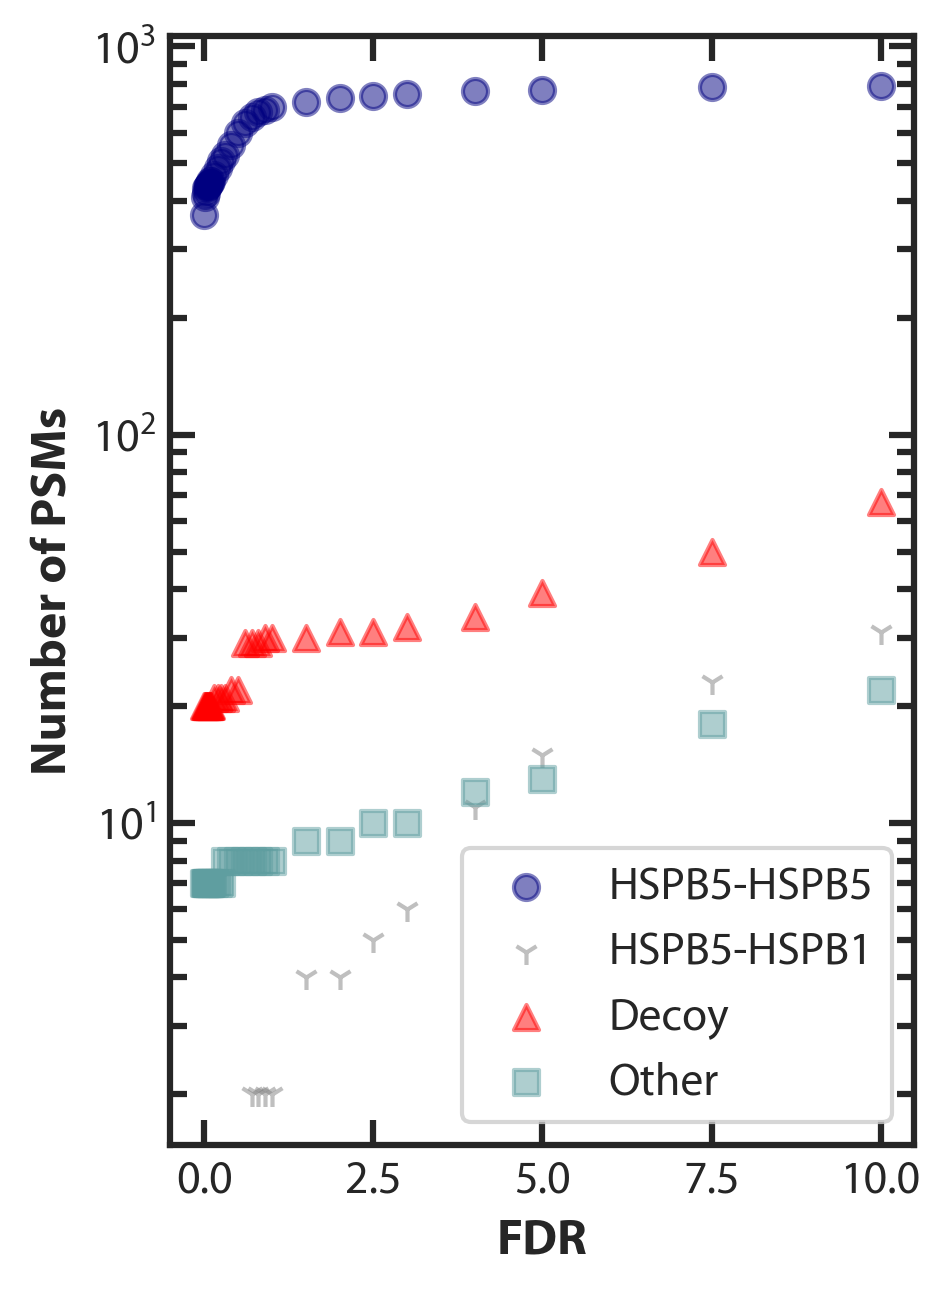

In [55]:
data=pd.DataFrame(d_Hpsms)
data=data.set_index([pd.Index(["FDR", "HSPB5-HSPB5","HSPB5-HSPB1", "Decoy", "Other"])])
data=data.transpose()
print("Number PSMs by Protein at Desired FDR")
print(data.loc[[0.0100]])
data["FDR%"]=data["FDR"]*100
fig, (ax1) = plt.subplots(nrows=1, ncols=1, constrained_layout=False, sharex=True)
fig.set_size_inches(3.2, 4.8)
#ax3=ax2.twinx()
ax1.scatter(data["FDR%"],data["HSPB5-HSPB5"],label='HSPB5-HSPB5',color="navy",alpha=0.5, marker="o")
ax1.scatter(data["FDR%"],data["HSPB5-HSPB1"],label="HSPB5-"+protein2,color="gray",alpha=0.5, marker="1")
ax1.scatter(data["FDR%"],data["Decoy"],label="Decoy",color="red",alpha=0.5,marker="^")
ax1.scatter(data["FDR%"],data["Other"],label="Other", color="cadetblue",alpha=0.5,marker="s")
ax1.legend()
ax1.set_ylabel("Number of PSMs")
plt.yscale("log")
plt.legend()
ax1.set_ylabel("Number of PSMs")
ax1.set_xlabel("FDR")
plt.savefig("FDRanalysis.pdf", bbox_inches='tight')
plt.show()

HSPB5-HSPB5 696 PSMs


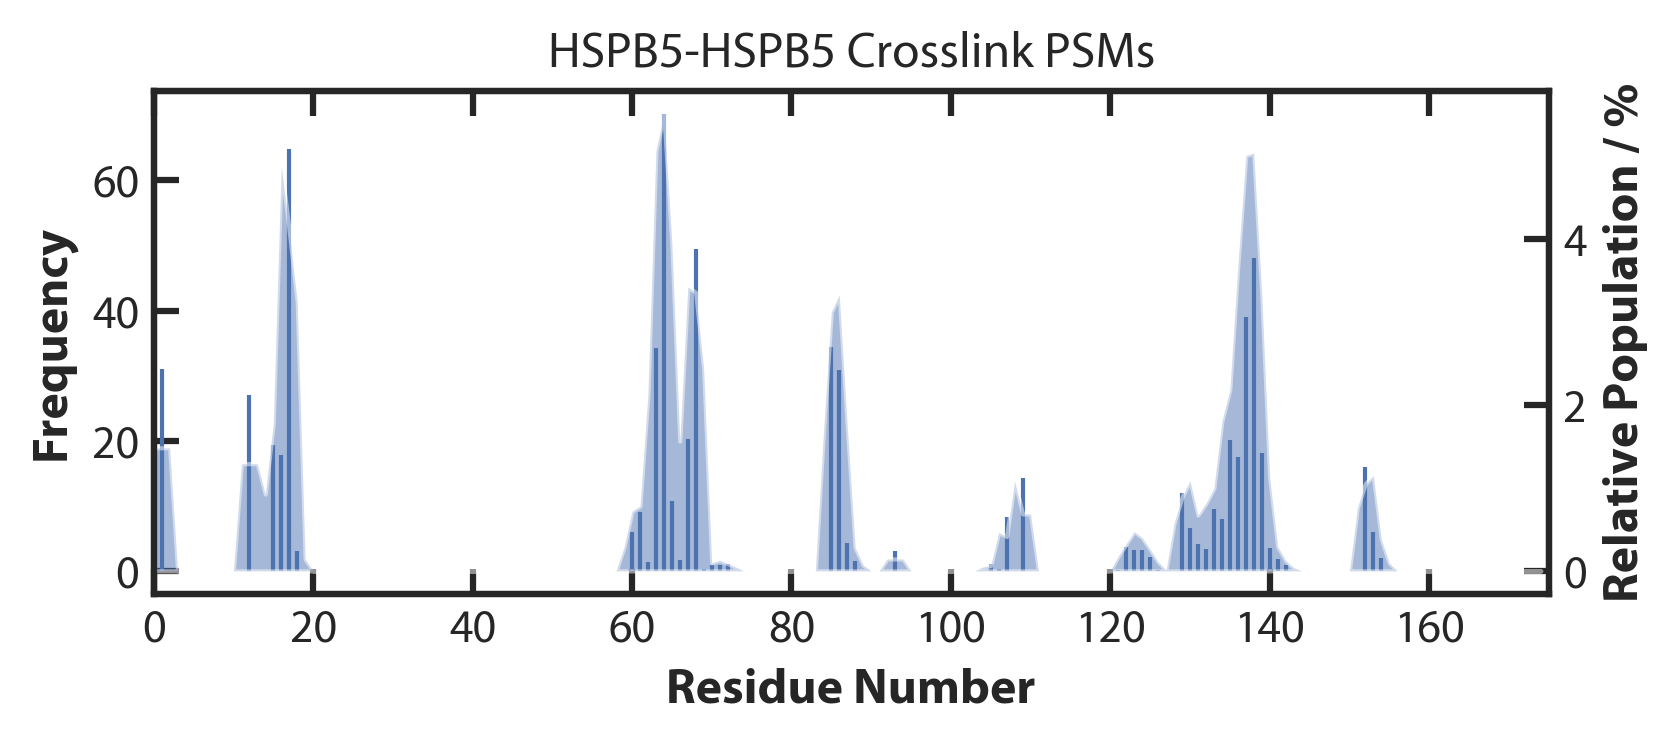

HSPB5-HSPB1 2 PSMs


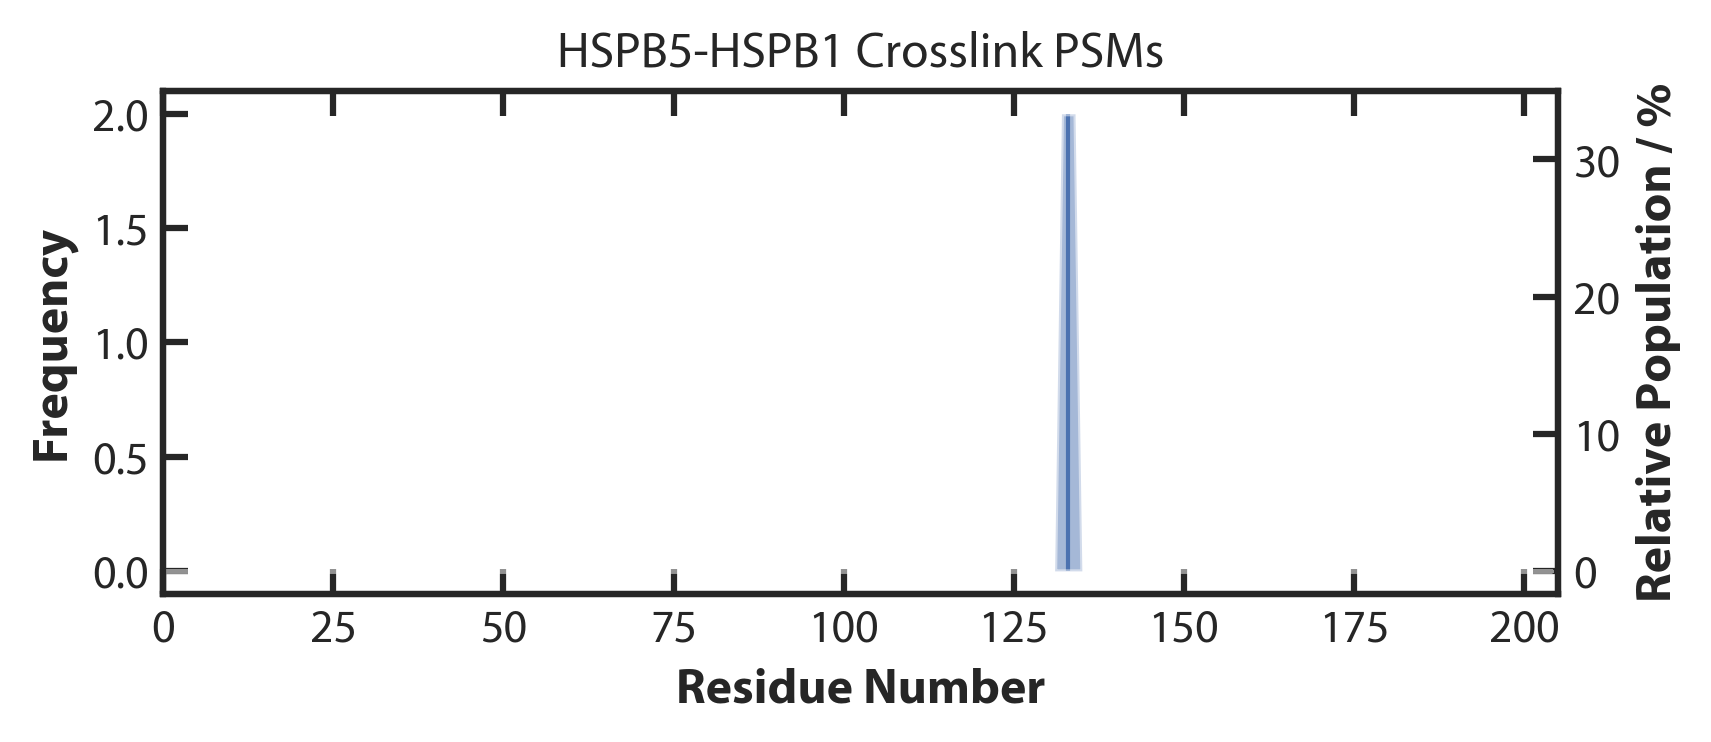

In [56]:
#plot both HSPB5-HSPB5 XLs and HSPB5-target XLs
XLs=[]
dproteins=[protein,protein2]
specs=[d_HBpsms,d_Tpsms]
#change list order for tables reported out to be for crosslinks to the desired protein
for x in range(len(dproteins)):
    pro=dproteins[x]
    result0=specs[x][DesiredFDR]
    kojak3=pd.DataFrame()
    if pro == protein:
        for index, row in kojaknonval.iterrows():
            if protein in row["Protein"] and protein2 in row["Protein"] and protein in row["Protein #1"] and protein in row["Protein #2"]:
                kojak3=kojak3.append(row)
            elif protein in row["Protein #1"] and protein in row["Protein #2"]:
                kojak3=kojak3.append(row)
        seq=sequence0
        #filter kojak results to reelvant protein
        #nned to filter this the same way I did peptideprophet results above
    elif pro == protein2:
        for index, row in kojaknonval.iterrows():
            if protein in row["Protein"] and protein2 in row["Protein"] and protein in row["Protein #1"] and protein in row["Protein #2"]:
                kojak3=kojak3.append(row)
            elif protein in row["Protein"] and protein2 in row["Protein"]:
                kojak3=kojak3.append(row)
        seq=clientseq
    #get column numbers for needed info
    xl1=kojak3.columns.get_loc("Protein #1 Site")+1
    pro1=kojak3.columns.get_loc("Protein #1")+1
    pep1=kojak3.columns.get_loc("Peptide #1")+1
    xl2=kojak3.columns.get_loc("Protein #2 Site")+1
    pep2=kojak3.columns.get_loc("Peptide #2")+1
    pro2=kojak3.columns.get_loc("Protein #2")+1
    psites=[]
    ppep=[]
    #Get crosslink site and peptide for each result in the non-valdiated search
    for each in kojak3.itertuples():
        if ";" in each[pro2]:
            pros=each[pro2].split(";")
            xls=each[xl2].split(";")
            #peps=each[pep2].split(";")
            for entry in pros:
                ind=pros.index(entry)
                if "HSPB5" in entry:
                    indf=ind
                elif protein2 in entry:
                    indf=ind
            psites.append(xls[indf])
            ppep.append(each[pep2])
        elif each[xl1]!=str(Bsite):
            psites.append(each[xl1])
            ppep.append(each[pep1])
        elif each[xl2]!=str(Bsite):
            psites.append(each[xl2])
            ppep.append(each[pep2])
        elif each[xl1]==str(Bsite) and each[xl2]==str(Bsite):
            #This part of code includes crosslink sites to the same residue (needed if WT or another protein present)
            if "B" not in each[pep2]:
                print(each[pep2])
                print(each[xl2])
                psites.append(each[xl2])
                ppep.append(each[pep2])
            if "B" not in each[pep1]:
                print(each[pep1])
                print(each[xl1])
                psites.append(each[xl1])
                ppep.append(each[pep1])
    for each in psites:
        if each== "na":
            print(error)
    kojak3["XL Site"]=psites
    kojak3["XL Peptide"]=ppep
    kojak3.to_excel("output.xlsx")
    kojak3['Possible Matches']=1
    #group by scan number and sum possible matches
    kjsort=kojak3.groupby(['Scan Number'], as_index=False).agg({'Possible Matches':'sum'})
    #remove possible matches from kojak3
    kojak3=kojak3.drop(columns=["Possible Matches"])
    #merge the grouped and non-group version to get the number of matches from kjsort and identitites of the matches from kojak3
    tots=pd.merge(left=kojak3, right=kjsort, left_on='Scan Number', right_on="Scan Number", how="right")
    #export data frame
    tots.to_excel("tots.xlsx")
    
    if len(result0)==0:
        print("No "+pro+" XLs")
    elif len(result0)>0:
        result0["Scan Number"]=result0["Scan Number"].astype(int)
        tots["Scan Number"]=tots["Scan Number"].astype(int)
        #merge kojak and peptide prophet results
        result0=pd.merge(left=result0, right=tots, left_on='Scan Number', right_on="Scan Number", how="left")
        #correct for amgiuity in number PSMs
        result0['PSMs']=result0["PSMs"]/result0["Possible Matches"]
        result0["PSM"]=result0['PSMs']
        result0.to_excel('result0.xlsx')
        xlAA=[]
        result0["XL Site"]=result0["XL Site"].str.split(';').str[0]
        result0["XL Site"]=result0["XL Site"].astype(int)
        #get list of amino acids crosslinked too
        for each in result0["XL Site"]:
            xlAA.append(seq[int(each)-1])
        result0["XL Site"]=result0["XL Site"].astype(int)
        result0=result0.drop(columns=["Linker Mass", "Protein #2", "Protein #1", "Peptide #2", "Peptide #1", "peptide", "protein",
                                 "Linked AA #1", "Linked AA #2", "Peptide #1 Score", "Peptide #2 Score", "Protein #1 Site",
                                 "Protein #2 Site", "protein1", "protein2", "ions", ])
        result0['xlAA']=xlAA
        result0["XL Peptide Length"]=result0["XL Peptide"].str.len()
        result0.head()
        result0.to_excel('result0.xlsx')
    
        #clean up result zero
        result0['XL Site']=result0['XL Site'].astype(int)
        result0['peak_area']=result0['peak_area'].replace("-",0)
        result0['peak_area']=result0['peak_area'].astype(float)
        result0['BPAsite']=BPAsite.strip('B')
        result0['BPAsite'].astype(float)
        result0['XL Peptide Length']=result0["XL Peptide"].str.len()

        def find_pep_pos(clean):
            ppos=sequence.find(clean)
            start=int(ppos)+1
            end=start+len(clean)-1
            return start, end

        ints=[]
        for each in result0["XL Peptide"]:
            start, end=find_pep_pos(each)
            ints.append(str(start)+"-"+str(end))

        result0["XL Peptide Range"]=ints

        #group by crosslink site and combine PSMs
        result1=result0.groupby(['XL Site']).agg({'PSM':'sum',
                                                                            'probability': 'mean', 'peak_area': 'sum',
                                             'BPAsite':'first', "Possible Matches":'mean'})
        result1=result1.reset_index()
        HXLPSMs=round(sum(result1["PSM"]))
        print("HSPB5-"+pro +" "+str(HXLPSMs)+" PSMs")
        result1.to_csv('figurevaluesummary'+pro+'.csv')
        result1.head()
    
        #add zero for sites with no XL PSMs before calculating averages
        xllink=result1.columns.get_loc("XL Site")+1
        links=[]
        for each in result1.itertuples():
            links.append(each[xllink])
        missing=[]
        for interval in range(0,len(seq),1):
            if interval not in links:
                missing.append(interval)
        nolinks=pd.DataFrame()
        nolinks['XL Site']=missing
        nolinks["XL Peptide Length"]=0
        nolinks['PSM']=0
        nolinks['probability']=0
        nolinks['peak_area']=0
        nolinks['protein1']=protein
        nolinks['protein2']=protein
        nolinks['BPAsite']=int(BPAsite.strip("B"))
        nolinks["Possible Matches"]=0
        frames=[result1, nolinks]
        result1=pd.concat(frames)
        #result1=result1.sort_values(['XLsite'],ascending=True)
        #make freq table
        freq=pd.DataFrame()
        freq["XLsite"]=result1['XL Site'].astype(float)
        freq["PSM"]=result1["PSM"]
        freq["Peptide length"]=result1["XL Peptide Length"]
        freq["Possible Matches"]=result1["Possible Matches"]
        freq=freq.sort_values(['XLsite'])
        freq.to_csv("XLfrequency"+pro+".csv")
        freq.head()
    
        #plot rolling average of 3 with numlin
        fig, (ax1, axl) = plt.subplots(nrows=2, ncols=1, constrained_layout=False, sharex=True)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
        hspace = 0.45
        fig.set_size_inches(6, 3.2)
        gs = gridspec.GridSpec(2, 1, height_ratios=[ 1,0.2], hspace=hspace) 
        def moving_average(x, w):
            return np.convolve(x, np.ones(w), 'same') / w

        ax1=plt.subplot(gs[0])

        ax1.vlines(freq['XLsite'],0.,freq['PSM'],label='Histogram')

        ax4 = ax1.twinx() 
        for i in [3]:
            rolling = moving_average(freq['PSM'],i)
            rolling *= 100./rolling.sum()
            ax4.fill_between(freq['XLsite'],0.,rolling,alpha=0.5,label="Window="+str(i))
            #ax4.legend()
        # Add legend to hist
        lines1, label1 = ax1.get_legend_handles_labels()
        lines2, label2 = ax4.get_legend_handles_labels()
        #ax1.legend(lines1+lines2, label1+label2)
        ax1.set_xlim(0,len(seq))
        ax4.set_xlim(0,len(seq))
        ax1.set_ylabel('Frequency')
        ax4.set_ylabel('Relative Population / %')
        title=protein+"-"+pro+" Crosslink PSMs"
        ax1.set_title(title)
        """
        axl=plt.subplot(gs[1])
        def setup(axl):
            axl.spines['right'].set_color('none')
            axl.spines['left'].set_color('none')
            axl.yaxis.set_major_locator(ticker.NullLocator())
            axl.spines['top'].set_color('none')
            axl.xaxis.set_ticks_position('bottom')
            axl.set_xlim(0, 175)
            axl.set_ylim(0, 175)
            axl.patch.set_alpha(0.0)
        setup(axl)
        NTR = patches.Rectangle((0, 0), 63.5, 60, linewidth=1, edgecolor='mediumseagreen', facecolor='mediumseagreen', label="NTR")
        ACD = patches.Rectangle((63.5, 0), 89, 60, linewidth=1, edgecolor='royalblue', facecolor='royalblue', label="ACD")
        CTR = patches.Rectangle((152.5, 0), 22.5, 60, linewidth=1, edgecolor='palevioletred', facecolor='palevioletred', label="CTR")
        # Add the patch to the Axes
        axl.add_patch(NTR)
        axl.add_patch(ACD)
        axl.add_patch(CTR)
        axl.set_xlabel('Residue Number')
        plt.plot(Bsite,33, marker="|", markersize=16, markeredgecolor="black", markerfacecolor="black", label="BPA Site", linewidth=1)
        """
        ax1.set_xlabel("Residue Number")
        plt.savefig("win3hist.pdf")
        plt.show()
    result0["Protein"]="HSPB5-"+pro+" XL"
    XLs.append(result0)

<ipython-input-57-d13faa8d71af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonHSPB5XL["PSM"]=1.0


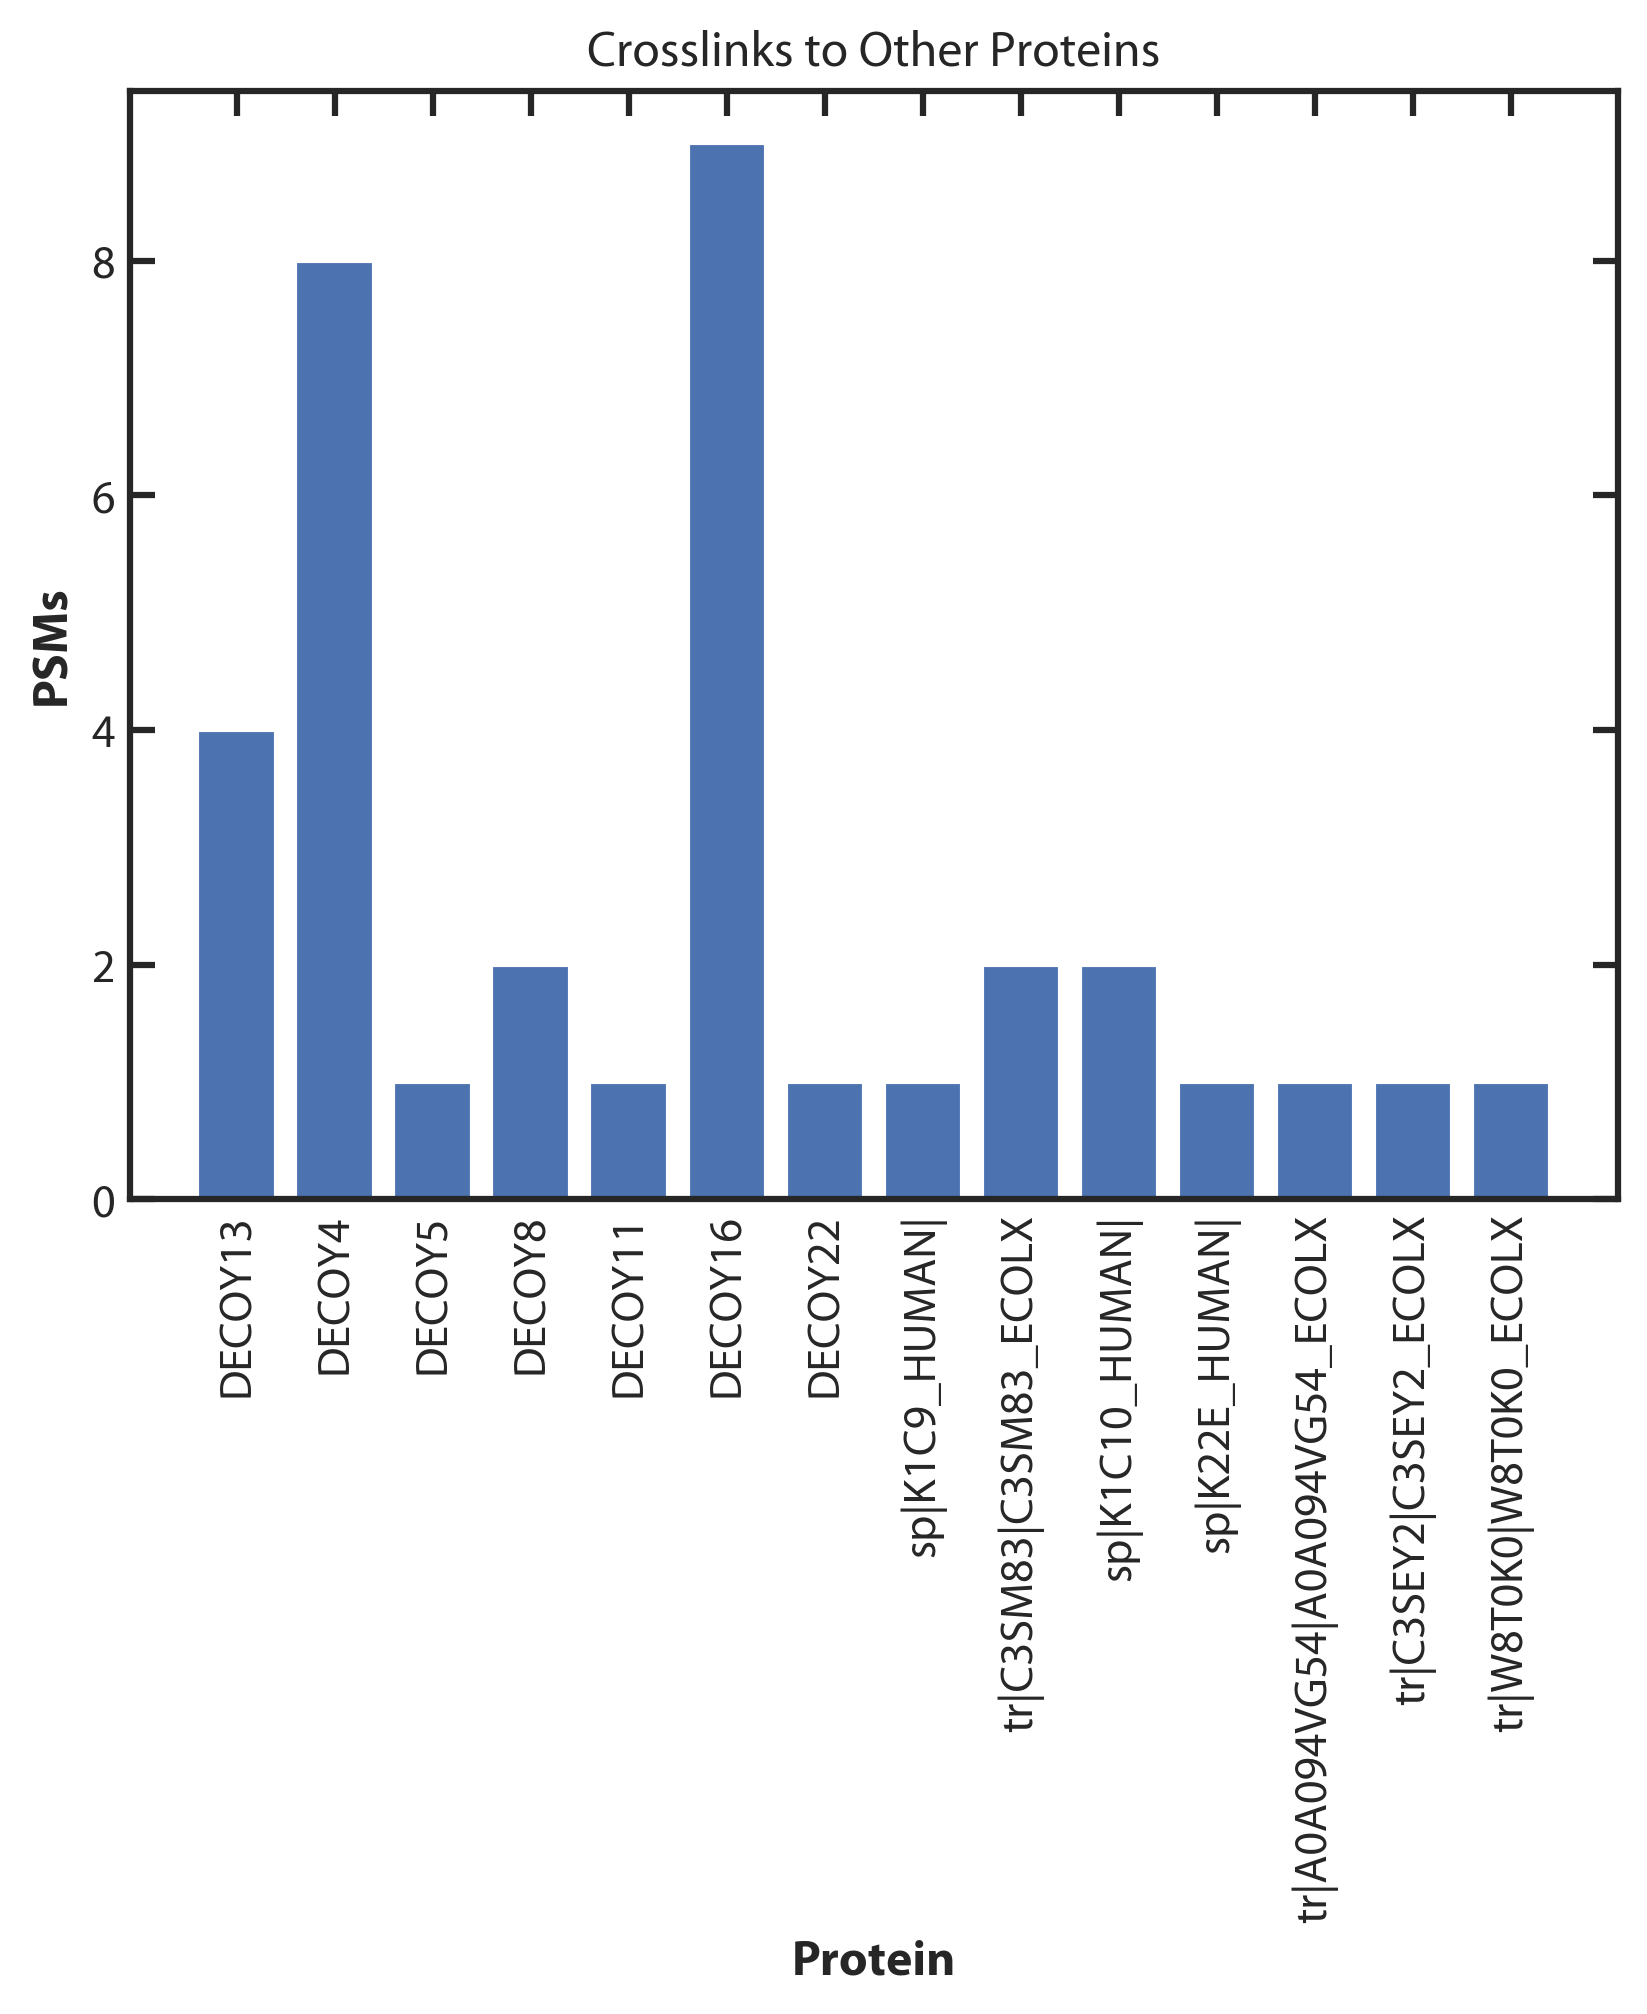

,protein1,protein2,PSM
0,DECOY13,sp|HSPB5_B9|HSPB5,4.0
1,DECOY4,DECOY17,2.0
2,DECOY4,"sp|HSPB5_B9|HSPB5,sp|HSPB5_WT|HSPB5",1.0
3,DECOY5,DECOY4,1.0
4,DECOY8,sp|HSPB5_B9|HSPB5,2.0


In [57]:
nonHSPB5XL0=validatedResults[(validatedResults["protein1"].str.contains(protein)==False)|(validatedResults["protein2"].str.contains(protein)==False)]
nonHSPB5XL=validatedResults[(validatedResults["protein"].str.contains(protein2)==False)]
nonHSPB5XL["PSM"]=1.0
nonHSPB5XL=nonHSPB5XL.groupby(['protein1',"protein2"]).agg({'PSM':'sum'})
nonHSPB5XL=nonHSPB5XL.reset_index()
nonHSPB5XL.to_excel("nonHSPB5XL_pros.xlsx")
#plot bar graph of XLs to other proteins
pros=[]
PSMs=[]
#make dataframe of just other pro and number PSMs first
for index, row in nonHSPB5XL.iterrows():
    if protein not in row["protein1"]:
        pros.append(row["protein1"])
        PSMs.append(row["PSM"])
    elif protein not in row["protein2"]:
        pros.append(row["protein2"])
        PSMs.append(row["PSM"])
#then plot like in teh comet nonspecific code
plt.bar(pros,PSMs)
plt.xticks(rotation=90)
plt.ylabel("PSMs")
plt.xlabel("Protein")
plt.title("Crosslinks to Other Proteins")
plt.savefig("otherproteinPSMs.pdf")
plt.show()
nonHSPB5XL.head()

For basic crosslink ID stop here, below gives additional plots that I find useful when analyzing new data

In [67]:
nonHSPB5XL=validatedResults[(validatedResults["protein1"].str.contains(protein)==False)|(validatedResults["protein2"].str.contains(protein)==False)]
nonHSPB5XL["PSM"]=1.0
nonHSPB5XL=nonHSPB5XL.groupby(['protein1',"protein2"]).agg({'PSM':'sum'})
nonHSPB5XL.to_excel("nonHSPB5XL_pros.xlsx")
nonHSPB5XL.head()

<ipython-input-67-66c1dee928ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonHSPB5XL["PSM"]=1.0


PSM
protein1 protein2                                
DECOY13  sp|HSPB5_B9|HSPB5                    4.0
DECOY4   DECOY17                              2.0
         sp|HSPB5_B9|HSPB5,sp|HSPB5_WT|HSPB5  1.0
DECOY5   DECOY4                               1.0
DECOY8   sp|HSPB5_B9|HSPB5                    2.0

In [68]:
print(minprob)

0.541


In [69]:
#work with noncrosslink results to get total PSMs and %XL PSMs
nc_val=noncrosslinks[noncrosslinks['probability']>=minprob]
NumUnlinked=len(nc_val)
TotalPSMs=NumUnlinked+TXLPSMs
#HXLPSMs is HSPB5 PSMs
#TXL PSMs is total XL PSM value
#nc_val=nc_val0[nc_val0["protein"].str.contains("DEC")== False]
#print(nXLPSMs+"=num PSMs with expected pro")
#tPSMs=len(nc_val0)+int(nXLPSMs)
print(str(TotalPSMs)+" total PSMs")
PXL=int(HXLPSMs)/TotalPSMs*100
print(str(PXL)+" %HSPB5 XL PSMs")
#get total nonXL area for later use
nc_val["peak_area"]=nc_val["peak_area"].replace("-",0)
nc_val["peak_area"]=nc_val["peak_area"].astype(float)
naA=sum(nc_val["peak_area"])
#get total XL area for later use
XLA=sum(result0['peak_area'])
#get total area
tA=float(naA+XLA)

8967 total PSMs
0.02230400356864057 %HSPB5 XL PSMs


<ipython-input-69-cc334efecd02>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_val["peak_area"]=nc_val["peak_area"].replace("-",0)
<ipython-input-69-cc334efecd02>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_val["peak_area"]=nc_val["peak_area"].astype(float)


In [70]:
nc_val0=noncrosslinks[noncrosslinks['probability']>=minprob]
nc_val0.head()

,probability,spectrum,xlink_type,kojak_score,delta_score,e-value,ppm_error,ions,peptide,protein,...,num_saavs_min,num_saavs_max,peff_mods,first_scan,last_scan,peak_intensity,peak_intensity_scan,fval,AccMass,isomassd
0,0.9929,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0523...,na,1.925,1.925,4.99E-06,-2.4464,/,R.KQVSGPER.T,"sp|HSPB5_WT|HSPB5,sp|HSPB5_B9|HSPB5",...,0,0,0,5139,5291,9.71E+09,5214,4.8834,-2.447,0
1,0.9931,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0523...,na,1.59,1.590,5.71E-06,-2.5356,/,R.KQVSGPER.T,"sp|HSPB5_WT|HSPB5,sp|HSPB5_B9|HSPB5",...,0,0,0,5139,5291,9.71E+09,5214,4.8297,-2.536,0
2,0.8312,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0523...,na,0.26,0.260,9.92E+01,-2.5356,/,R.KQVSGPER.T,"sp|HSPB5_WT|HSPB5,sp|HSPB5_B9|HSPB5",...,0,0,0,5139,5291,9.71E+09,5214,-1.8388,-2.536,0
4,0.9950,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0524...,na,2.08,2.080,8.23E-07,-2.4464,/,R.KQVSGPER.T,"sp|HSPB5_WT|HSPB5,sp|HSPB5_B9|HSPB5",...,0,0,0,5139,5291,9.71E+09,5214,5.6041,-2.447,0
5,0.9949,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0524...,na,1.5,1.500,3.24E-04,-3.0106,/,R.KQVSGPER.T,"sp|HSPB5_WT|HSPB5,sp|HSPB5_B9|HSPB5",...,0,0,0,5139,5291,9.71E+09,5214,3.2137,-3.011,0


In [71]:
#add peptide positions to noncrosslinked target protein peptides
pro=nc_val.columns.get_loc("protein")+1
pep=nc_val.columns.get_loc("peptide")+1
pepstarts=[]
pepends=[]
cpep=[]
nc_valH=nc_val[nc_val["protein"].str.contains("HSPB5")]

def clean_up_NApeptide(peptide):
    clean0=peptide.strip("-)0123456789(")
    clean1=clean0.strip("GASPVTCLBINQDKEMOHFURYW")
    s = '[147.04]251.09'
    clean=clean1.translate({ord(i): None for i in s})
    ppos=sequence.find(clean)
    
    start=int(ppos)+1
    end=start+len(clean)-1
    return clean, start, end

for each in nc_valH.itertuples():
    [clean, start, end]=clean_up_NApeptide(each[pep])
    pepstarts.append(start)
    pepends.append(end)
    cpep.append(clean)
        
nc_valH["peptide start"]=pepstarts
nc_valH["peptide end"]=pepends
nc_valH["clean peptide"]=cpep
#define charge
nc_valH["Charge"]=nc_valH['spectrum'].str[-1]
nc_valH["Charge"]=nc_valH["Charge"].astype(int)
nc_valH["peak_intensity"]=nc_valH["peak_intensity"].astype(float)
#add peptide length to dataframe and plot
nc_valH["peptide length"]=nc_valH["clean peptide"].str.len()

<ipython-input-71-dd9fd5d6fed6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_valH["peptide start"]=pepstarts
<ipython-input-71-dd9fd5d6fed6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_valH["peptide end"]=pepends
<ipython-input-71-dd9fd5d6fed6>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [72]:
#think i need to add protein codes to above for this and merge XL and nonXL
#switch order of these based on order of prior loop
#XLs[1]["Protein"]="HSPB5-HSPB5 XL"
#XLs[0]["Protein"]="HSPB5-HSPB5 XL"
proteins=[]
for each in nc_val['protein']:
    if "HSPB5" in each:
        proname="HSPB5"
    elif "HSPB6" in each:
        proname="HSPB6"
    elif "HSPB1" in each:
        proname="HSPB1"
    elif "Tau" in each and "ECOL" not in each:
        proname="Tau"
    elif "ALBU" in each:
        proname='BSA'
    elif "TRY" in each:
        proname='Trypsin'
    elif "SSPA_STAAU" in each:
        proname='GluC'
    elif "Angio" in each:
        proname="UWPR Standard"
    elif "DEC" in each:
        proname="Decoy"
    else:
        proname="other"
    proteins.append(proname)
nc_val["Protein"]=proteins
result=pd.concat([nc_val, XLs[0],XLs[1]])
#result=pd.concat([nc_val, XLs[1]])
result['Retention Time (min)']=result['retention_time_sec'].astype(int)/60
#this group by keeps any XL PSMs with ambisuiity still represtedn by only one point
result=result.groupby(['spectrum',"Protein","Retention Time (min)"],as_index=False).agg({'XL Site':'mean',"peak_intensity":"mean"})
result.head()

<ipython-input-72-dc1e90640ba5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_val["Protein"]=proteins


,spectrum,Protein,Retention Time (min),XL Site,peak_intensity
0,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0523...,HSPB5,12.566667,NaN,9.710000e+09
1,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0523...,HSPB5,12.566667,NaN,9.710000e+09
2,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0523...,HSPB5,12.566667,NaN,9.710000e+09
3,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0524...,HSPB5,12.583333,NaN,9.710000e+09
4,240214_B9_T_std_pH75_dim9_PRM_PrevData_01.0524...,HSPB5,12.583333,NaN,9.710000e+09


C:\Users\Lindsey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lindsey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lindsey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lindsey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lindsey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of 

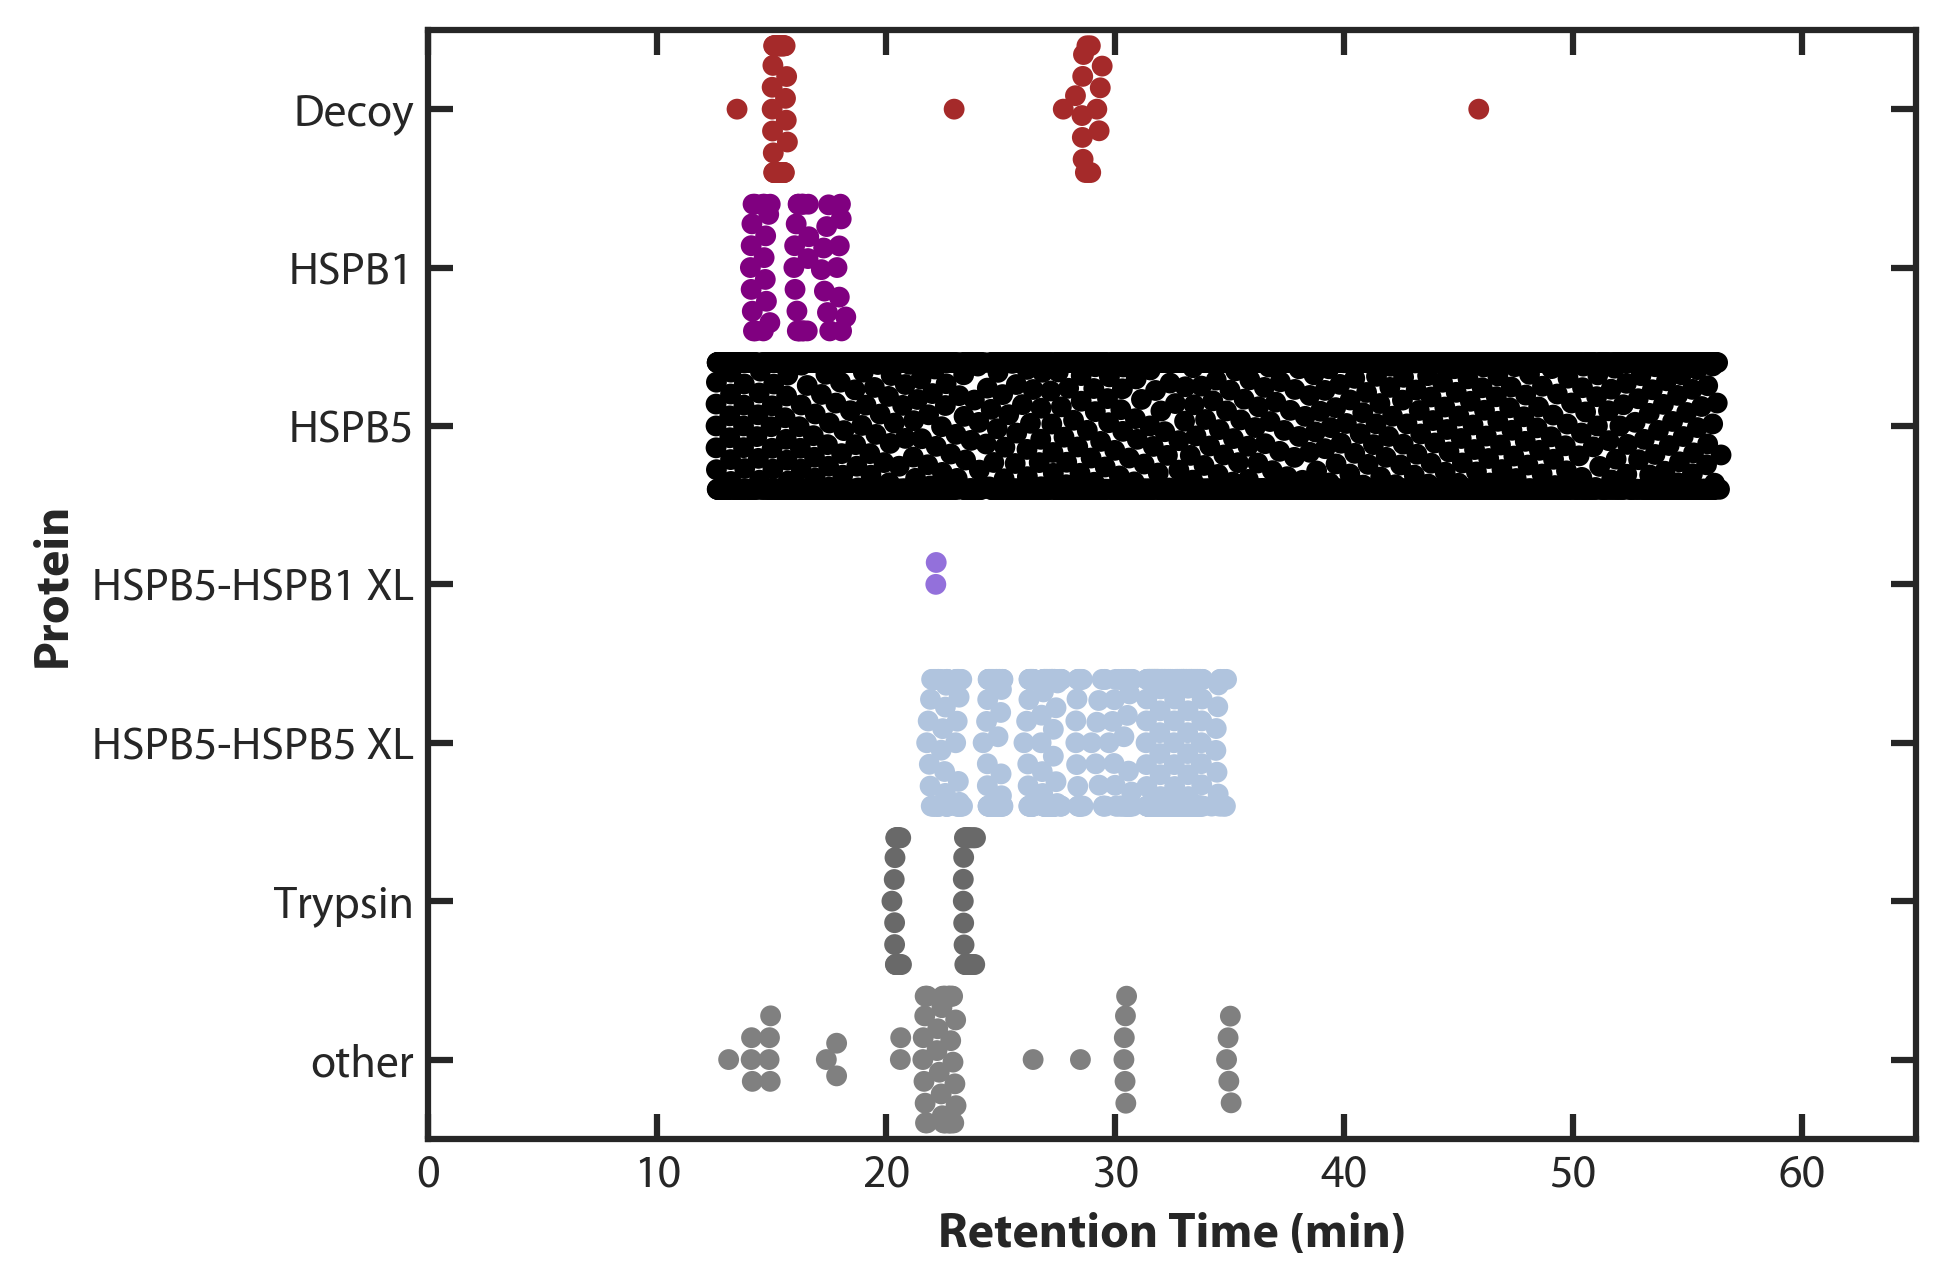

In [73]:
result=result.sort_values(by=['Protein'])
plot=seaborn.swarmplot(data=result, y='Protein', x='Retention Time (min)',
                  palette={'HSPB5':'black', 'Decoy':"brown",'Trypsin':'dimgrey', 'other':'gray', 'GluC':'darkgrey', 'BSA':'steelblue',
                           'HSPB5-HSPB5 XL':'lightsteelblue', 'UWPR Standard':'mediumblue',"HSPB1":"purple",
                          "HSPB6":"darkslateblue","Tau":"turquoise",
                            'HSPB5-'+protein2+' XL':"mediumpurple"})
plot.set(xlim=(0,maxgrad))
plt.show()

C:\Users\Lindsey\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


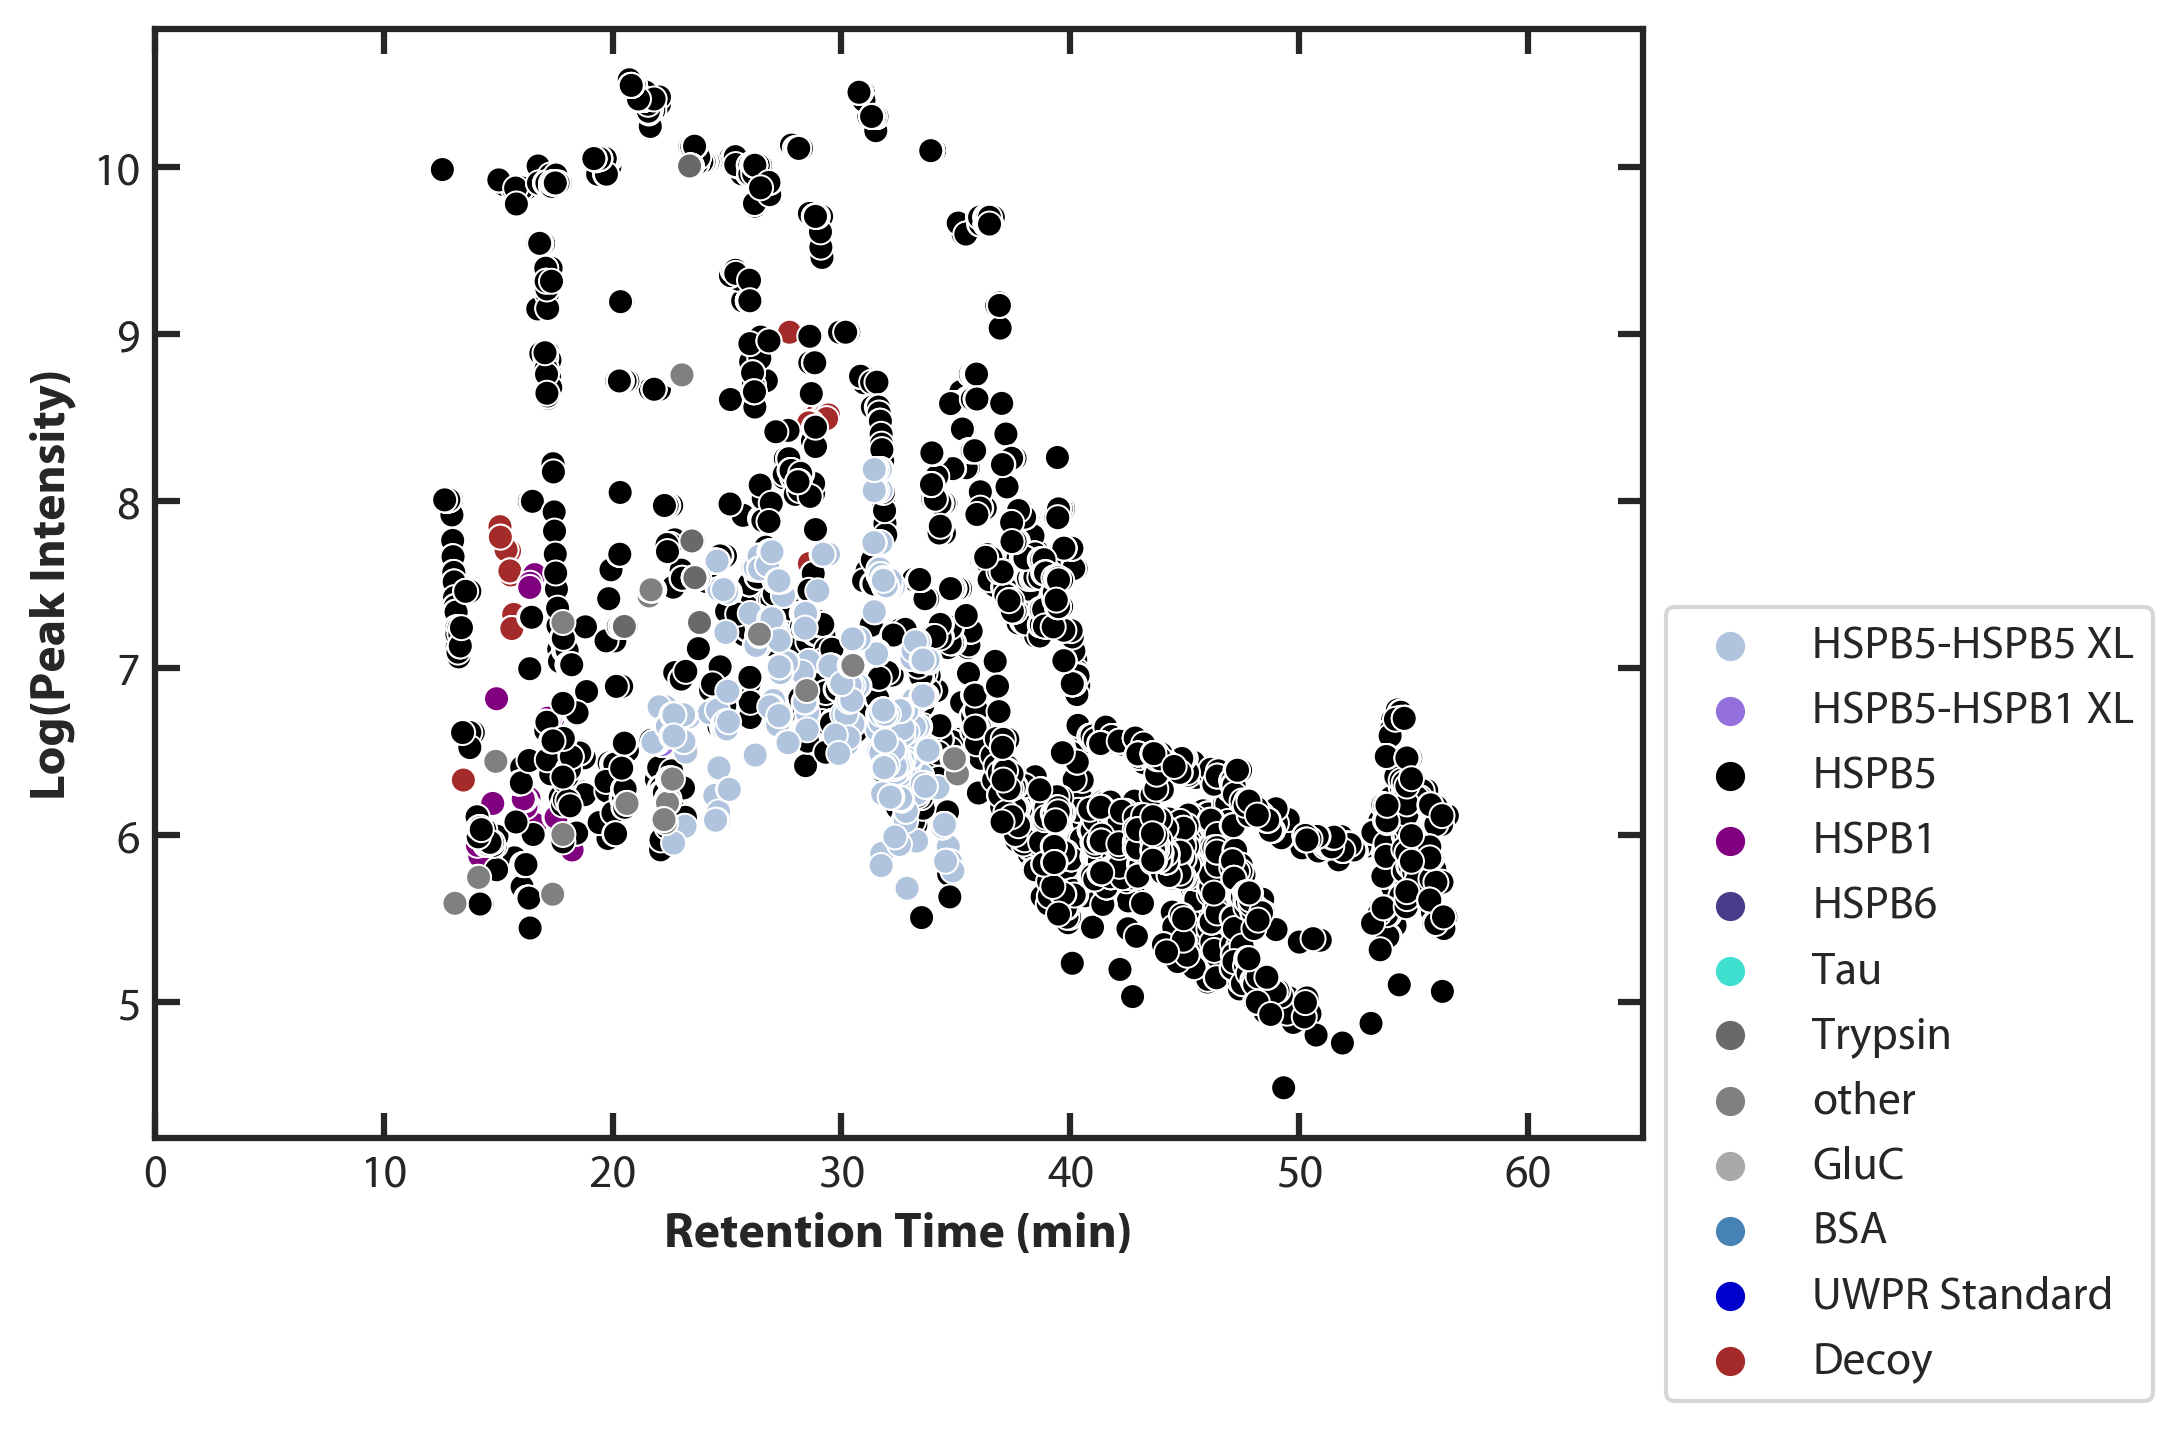

In [74]:
result=result.sort_values(by="Protein")
result["peak_intensity"]=result["peak_intensity"].replace("-",0)
result["peak_intensity"]=result["peak_intensity"].astype(float)
result["Log(Peak Intensity)"]=np.log10(result["peak_intensity"])
plot1=seaborn.scatterplot(data=result, x="Retention Time (min)", y='Log(Peak Intensity)', hue='Protein',
                        hue_order=['HSPB5-HSPB5 XL','HSPB5-'+protein2+' XL', "HSPB5", "HSPB1","HSPB6",
                                  "Tau", "Trypsin", "other", "GluC","BSA","UWPR Standard", "Decoy"],
                        palette={'HSPB5-HSPB5 XL':'lightsteelblue', 'HSPB5':'black',
                                 'Trypsin':'dimgrey', 'other':'gray', 'GluC':'darkgrey', 'BSA':'steelblue',
                                 'UWPR Standard':'mediumblue',"HSPB1":"purple", 'Decoy':"brown",
                          "HSPB6":"darkslateblue","Tau":"turquoise",'HSPB5-'+protein2+' XL':"mediumpurple"})
plot1.set(xlim=(0, maxgrad))
plot1.legend(bbox_to_anchor=(1, 0.5))
plt.show()

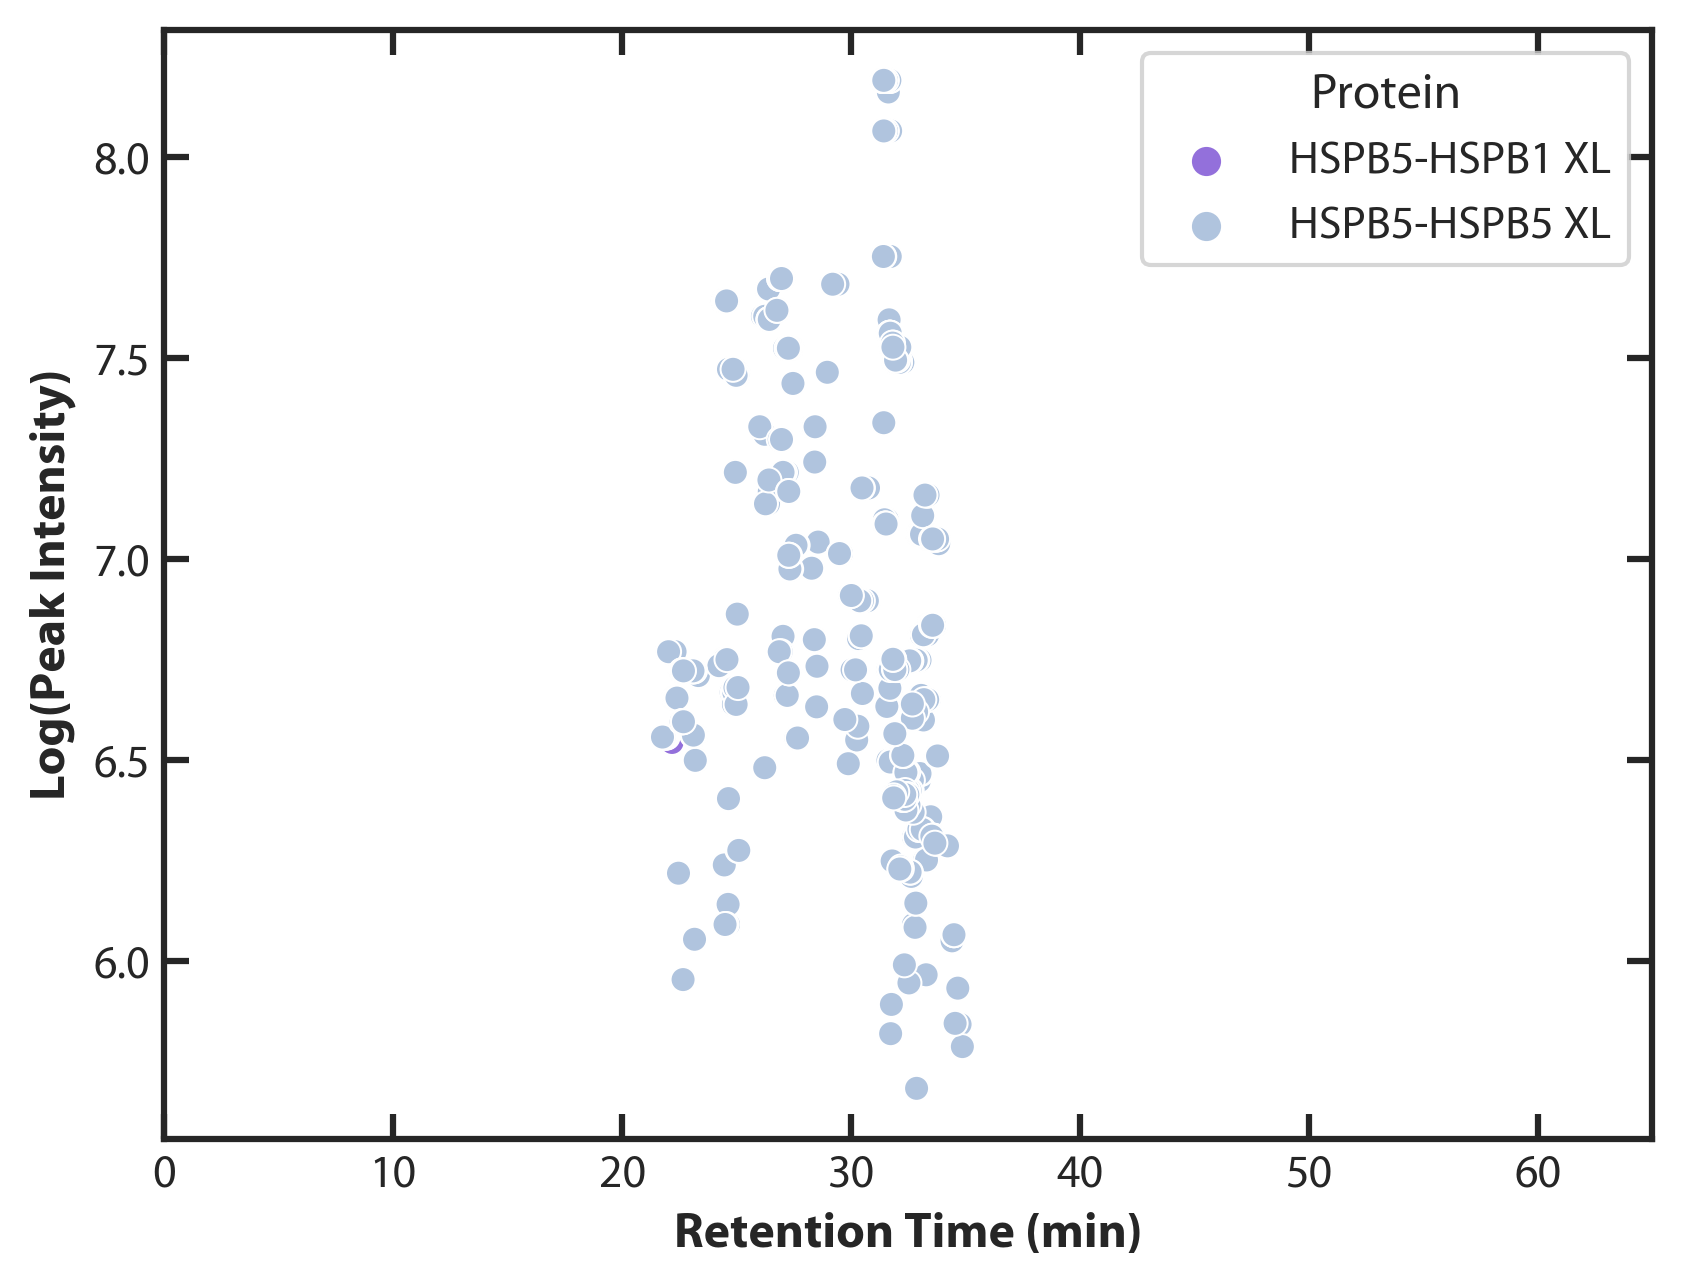

In [75]:
#plot just XL intensity
#work from result and not result zero for this because result has log(intensity) already"
HSPBs=result[result["Protein"].str.contains("XL")]
plt1=seaborn.scatterplot(data=HSPBs, x="Retention Time (min)", y='Log(Peak Intensity)', hue='Protein',
                    palette={'HSPB5-HSPB5 XL':'lightsteelblue','HSPB5-'+protein2+' XL':"mediumpurple"})
plt1.set(xlim=(0,maxgrad))
plt.show()

### 

In [ ]:
#track specific peptide length
#typically use this to analyze BPA peptide
trackpos=24
track0=nc_valH[nc_valH["peptide start"]<=trackpos]
BPApeps=track0[track0["peptide end"]>=trackpos]
BPApeps["peptide"]=BPApeps["peptide"].astype(str)
BPApeps["#PSMs"]=1
BPApeps["pep range"]=BPApeps["peptide start"].astype(str)+"-"+BPApeps["peptide end"].astype(str)
BPAp=BPApeps.groupby(['peptide'], as_index=False).agg({'#PSMs':'sum',"peptide length":"mean", "pep range":"first"})
BPAp=BPAp.sort_values(['#PSMs'],ascending=False)
totals=BPAp.sum()
BPAp.to_excel('All_BPA_Peptides.xlsx')
print(str(len(BPAp))+" total num diff BPA peptides")
#calc ave and summary of BPA peps
avepeplen=BPApeps["peptide length"].mean()
peplenstd=BPApeps["peptide length"].std()
rsd=peplenstd/avepeplen
#also get most common and what % of PSMs it is
bpsumm=pd.DataFrame()
print(type(BPAp.iloc[0]["peptide"]))
bpsumm["Most Common"]=[BPAp.iloc[0]["peptide"]]
bpsumm["Range of most common"]=[BPAp.iloc[0]["pep range"]]
bpsumm["% PSMs most common"]=[BPAp.iloc[0]["#PSMs"]/totals["#PSMs"]*100]
bpsumm["Average Length"]=[avepeplen]
bpsumm["%RSD Peptide Length"]=[peplenstd]
bpsumm["# Different Peptides"]=str(len(BPAp))
bpsumm.to_excel("BPApeptide_summary.xlsx")
bpsumm.head()

In [ ]:
#mass and charge analysis
#get non XL mass values
maxnonm=max(nc_valH['calc_neutral_pep_mass'])
minnonm=min(nc_valH["calc_neutral_pep_mass"])
avenonm=stat.mean(nc_valH["calc_neutral_pep_mass"])
stdevnonm=stat.stdev(nc_valH["calc_neutral_pep_mass"])
#get XL mass values
maxXLm=max(result0["calc_neutral_pep_mass"])
minXLm=min(result0["calc_neutral_pep_mass"])
aveXLm=stat.mean(result0["calc_neutral_pep_mass"])
stdevXLm=stat.stdev(result0["calc_neutral_pep_mass"])
#get non XL charge values
maxnonc=max(nc_valH['Charge'])
minnonc=min(nc_valH['Charge'])
avenonc=stat.mean(nc_valH["Charge"])
stdevnonc=stat.stdev(nc_valH["Charge"])
modenonc=stat.mode(nc_valH["Charge"])
#get XL charge values
maxXLc=max(result0['Charge'])
minXLc=min(result0['Charge'])
aveXLc=stat.mean(result0["Charge"])
stdevXLc=stat.stdev(result0["Charge"])
modeXLc=stat.mode(result0["Charge"])
#make table
massandchargeaves=pd.DataFrame(columns=['','nonXL','XL'])
massandchargeaves['']=['Max Mass', 'Min Mass', 'Average Mass', 'Std dev mass',
                      'Max Charge', 'Min Charge', 'Average Charge', 'Std dev charge',
                       'Most common Charge']
massandchargeaves['nonXL']=[maxnonm, minnonm, avenonm, stdevnonm, maxnonc, minnonc,
                           avenonc, stdevnonc, modenonc]
massandchargeaves['XL']=[maxXLm, minXLm, aveXLm, stdevXLm, maxXLc, minXLc,
                           aveXLc, stdevXLc, modeXLc]
#massandchargeaves.to_excel("massandchargeaves.xlsx")
massandchargeaves.head()

In [ ]:
#intensity table
nonXLmean=stat.mean(nc_valH["peak_intensity"])
nonXLstd=stat.stdev(nc_valH["peak_intensity"])
nonXLmed=stat.median(nc_valH["peak_intensity"])
XLmean=stat.mean(result0["peak_intensity"])
XLstd=stat.stdev(result0["peak_intensity"])
XLmed=stat.median(result0["peak_intensity"])
intaves=pd.DataFrame(columns=['','nonXL','XL'])
intaves['']=['Average', 'Standard Deviation', 'Median']
intaves['nonXL']=[nonXLmean,nonXLstd,nonXLmed]
intaves['XL']=[XLmean,XLstd,XLmed]
#intaves.to_excel("intensityaverages.xlsx")
intaves.head()